In [112]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import scipy as sc
import numpy as np
from scipy.stats import multivariate_normal
import numpy as np
import pandas as pd
from sklearn import preprocessing


In [118]:
data = np.genfromtxt('testCRT.csv', delimiter=',')

In [109]:
pdiff=data[:,6].copy()
pT=data[:,7].copy()
Y=100*pdiff/pT
X=preprocessing.scale(data[:,:6])
m=np.percentile(Y,25)
Y[Y<m]=0
Y[Y>m]=1

In [108]:
np.percentile(Y,25)

100.02440480601609

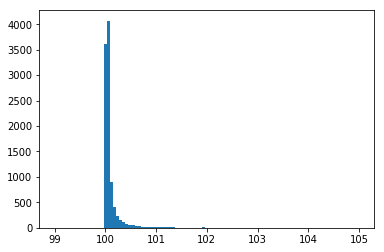

In [106]:
fig,ax=plt.subplots()
h=ax.hist(Y,np.linspace(99,105,100))


In [67]:
print X.shape
print Y.shape

(10000, 6)
(10000,)


In [110]:
Y[Y==0].shape

(2500,)

In [111]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=100)
clf = clf.fit(X, Y)
Ypred=clf.predict(X)

In [113]:
Ypred[Ypred==1].shape

(8666,)

(-10, 3)

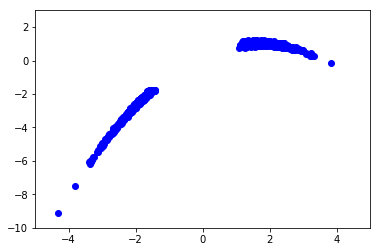

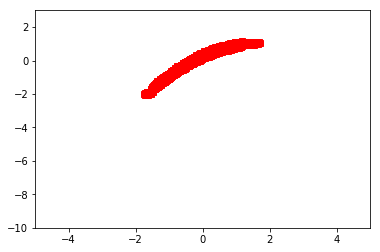

In [116]:
ind0=Ypred==0
ind1=Ypred==1
fig,ax=plt.subplots()
ax.plot(X[ind0,0],X[ind0,1],'bo')
ax.set_xlim([-5,5])
ax.set_ylim([-10,3])
fig,ax=plt.subplots()
plt.plot(X[ind1,0],X[ind1,1],'rs')
ax.set_xlim([-5,5])
ax.set_ylim([-10,3])

In [71]:
def printtree(estimator):
# estimator=clf
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()
    


getleafpaths(clf)

5
		node=2 leaf node.
		node=3 leaf node.
	node=4 leaf node.


({1: [(0, 'lte', 31.888317108154297)],
  2: [(0, 'lte', 31.888317108154297), (0, 'lte', 28.434261322021484)],
  3: [(0, 'lte', 31.888317108154297), (0, 'gt', 28.434261322021484)],
  4: [(0, 'gt', 31.888317108154297)]},
 [2, 3, 4])

In [15]:

def plotellipse(MU,SIG):
    MU=MU.reshape(-1,1)
    th=np.linspace(0,2*np.pi,100)
    X=np.zeros((100,2))
    for i in range(100):
        X[i,:]=( np.dot(sc.linalg.sqrtm(SIG),np.array([[np.cos(th[i])],[np.sin(th[i])]]))+MU ).transpose()[0]
    plt.plot(X[:,0],X[:,1],'r')

In [32]:


Mu0=np.array([[30],[np.pi/2]])
P0=np.array( [[2**2,0],[0,(np.pi/6)**2]] )
N=1000
X0=np.random.multivariate_normal(Mu0.transpose()[0], P0, N)

def F(rth):
    x=rth[0]*np.cos(rth[1])
    y=rth[0]*np.sin(rth[1])
    return np.array([x,y])

def FJac(rth):
    th=rth[1]
    r=rth[0]
    return np.array( [[np.cos(th),-r*np.sin(th)],[np.sin(th),r*np.cos(th)]] )

Y=np.zeros((N,2))
p0=multivariate_normal.pdf(X0, Mu0.transpose()[0], P0)
py=np.zeros(p0.shape)

for i in range(N):
    Y[i,:]=F(X0[i,:])
    py[i]=p0[i]/np.linalg.det( FJac(X0[i,:]))
    

In [33]:
Muy_est=np.mean(Y,axis=0)
Py_est=np.cov(Y,rowvar=False)
# print Muy_est.shape
pyest=multivariate_normal.pdf(Y, Muy_est, Py_est)
pdiff=100*np.abs( np.divide((py-pyest),py) )

49.5518155106


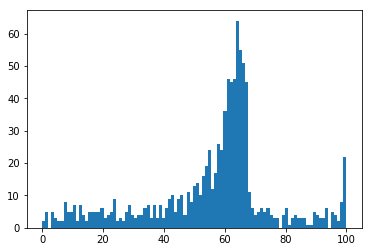

In [34]:
thres=np.percentile(np.abs(pdiff),25)
print thres
# plt.hist(np.abs(pdiff),100);
fig,ax=plt.subplots()
h=ax.hist(np.abs(pdiff),np.linspace(0,100,100))

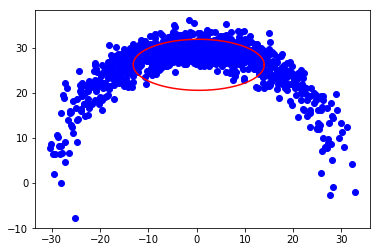

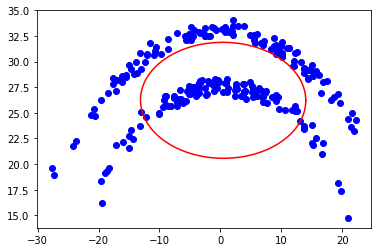

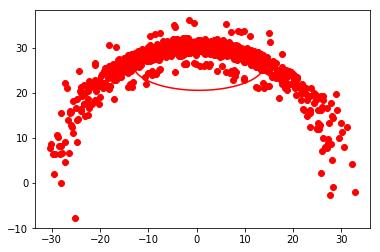

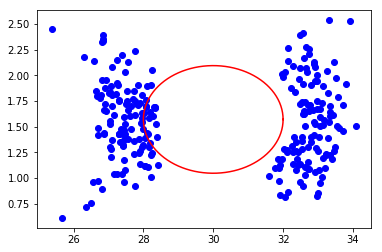

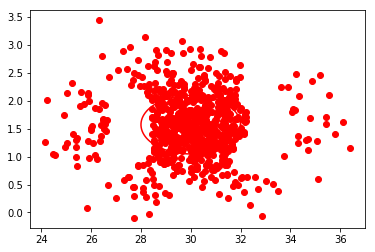

In [37]:
plt.figure()
indlow=pdiff<thres
plt.plot(Y[:,0],Y[:,1],'bo')
plotellipse(Muy_est,Py_est)

plt.figure()
indlow=pdiff<thres
plt.plot(Y[indlow,0],Y[indlow,1],'bo')
plotellipse(Muy_est,Py_est)

plt.figure()
indhigh=pdiff>=thres
plt.plot(Y[indhigh,0],Y[indhigh,1],'ro')
plotellipse(Muy_est,Py_est)

plt.figure()
indlow=pdiff<thres
plt.plot(X0[indlow,0],X0[indlow,1],'bo')
plotellipse(Mu0,P0)

plt.figure()
indhigh=pdiff>=thres
plt.plot(X0[indhigh,0],X0[indhigh,1],'ro')
plotellipse(Mu0,P0)



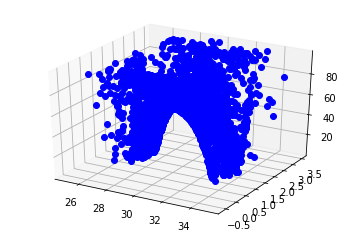

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X0[pdiff<100,0],X0[pdiff<100,1],pdiff[pdiff<100],'bo')

In [375]:
def GetMeanCov(X,w=None):
    M=np.average(X,axis=0,weights=w)
#     P=np.cov(X,rowvar=False,aweights=w)
    PP=0
    if w is None:
        w=np.ones(X.shape[0])/X.shape[0]
        
    for i in range(X.shape[0]):
        PP=PP+w[i]*np.dot((X[i,:]-M).reshape(-1,1),(X[i,:]-M).reshape(1,-1) )
    
    return (M,PP)

def UnscentedTransform_pts(mu,P):
    mu=mu.copy().reshape(1,-1)[0]
    n=P.shape[0];
    X=np.zeros((2*n+1,n))
    w=np.zeros(2*n+1)
    if n<4:
        k=3-n;
    else:
        k=1;

    X[0,:]=mu;
    w[0]=k/(n+k);
    A=sc.linalg.sqrtm((n+k)*P);
    for i in range(0,n):
        X[i+1,:]=(mu+A[:,i])
        X[i+n+1,:]=(mu-A[:,i])
        w[i+1]=1/(2*(n+k));
        w[i+n+1]=1/(2*(n+k));
    
    return (X,w)

class GaussMixModel(object):
    def __init__(self,ws,Ms,Ps):
        self.weights=ws
        self.means=np.array(Ms).copy()
        self.covs=np.array(Ps).copy()
        self.N=len(ws)
        
    def evalaute_probability(self,X):
        p=np.zeros(X.shape[0])
        for i in range(self.N):
            p=p+self.weights[i]*multivariate_normal.pdf(X, self.means[i], self.covs[i])
        return p
    def get_component_probabilities(self,X):
        p=[]
        for i in range(self.N):
            p.append( multivariate_normal.pdf(X, self.means[i], self.covs[i]) )
        return np.array(p)
    
    def getweight_rangeid(self,w):
        W={}
        for i in range(0,self.N):
            if i==0:
                W[0]=(0,self.weights[0])
            else:
                W[i]=( W[i-1][1],W[i-1][1]+self.weights[i])
            if w>=W[i][0] and w<W[i][1]:
                return i
            
#         D={}
#         for key,value in W.items():
#             D[value]=key
        
        
    def randomsamples(self,N,scale=1):
        
        X=np.zeros((N,self.covs[0].shape[0]))
        for i in range(N):
            w=np.random.random(1)
            ind=self.getweight_rangeid(w)
#             print w,ind
            X[i,:]=np.random.multivariate_normal(self.means[ind], scale**2*self.covs[ind], 1)
        return X
        
        
    def optimize_weights_original(self,X,M0,P0):
        M0=M0.reshape(1,-1)[0]
        p0=multivariate_normal.pdf(X, M0, P0)
        p=self.get_component_probabilities(X)
        A=p.transpose()
        b=p0
        weights=np.linalg.lstsq(A, b)[0]
        weights=weights/np.sum(weights)
        self.weights=weights
        
        return weights
    
    def optimize_weights_prob(self,X,pT):
        p0=pT
        p=self.get_component_probabilities(X)
        A=p.transpose()
        b=p0
        weights=np.linalg.lstsq(A, b)[0]
        weights=weights/np.sum(weights)
        self.weights=weights
        
        return weights
    
    def plotcomp_ellipsoids(self,k,comp=None,ax=None):
        if comp is None:
            rang=range(self.N)
        else:
            rang=[comp]
        for i in rang:
            MU=self.means[i].reshape(-1,1)
            SIG=self.covs[i]
            sqrtmSIG=sc.linalg.sqrtm(k*SIG)
            th=np.linspace(0,2*np.pi,100)
            X=np.zeros((100,2))
            for j in range(100):
                X[j,:]=( np.dot(sqrtmSIG,np.array([[np.cos(th[j])],[np.sin(th[j])]]))+MU ).transpose()[0]
            if ax is None:
                plt.plot(X[:,0],X[:,1],'r')
            else:
                ax.plot(X[:,0],X[:,1],'r')
                
        
def transformGMM(GMM0,Func):
    GMM1=GaussMixModel(GMM0.weights,GMM0.means,GMM0.covs)
    for i in range(GMM0.N):
        X,w=UnscentedTransform_pts(GMM0.means[i],GMM0.covs[i])
        Y=np.zeros(X.shape)
        for j in range(X.shape[0]):
            Y[j,:]=Func(X[j,:])
        mu,P=GetMeanCov(Y,w=w)
        GMM1.means[i]=mu
        GMM1.covs[i]=P
    return GMM1

def getleafpaths(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    nodepath={}
    leafnodes=[]
    print n_nodes
    for i in range(n_nodes):
        nodepath[i]=[]
        if is_leaves[i]:
            leafnodes.append(i)
            
    for i in range(n_nodes):
            
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            L=nodepath[i]+[(feature[i],'lte',threshold[i])]
            R=nodepath[i]+[(feature[i],'gt',threshold[i])]
            
            nodepath[ children_left[i]  ]=L
            nodepath[ children_right[i] ]=R
            
    del nodepath[0]
    return (nodepath,leafnodes)

def getleafids(X,nodepaths,leafnodes):
#     MajorIndex=np.array(range(X.shape[0]))
    Xleafids=np.zeros(X.shape[0])
    for lfn in leafnodes:
        path=nodepaths[lfn]
        ind=np.ones(X.shape[0], dtype=bool)
        for pp in path:
            if pp[1]=='lte':
                ind=ind & (X[:,pp[0]]<=pp[2])
            else:
                ind=ind & (X[:,pp[0]]>pp[2])
        Xleafids[ind]=lfn
    return Xleafids

def getclassifiedregions(pdiff,thres,X,min_samples_leaf=100,max_depth=2):
    err=pdiff.copy()
    indhigh=pdiff>=thres
    indlow=pdiff<thres
    err[indhigh]=1
    err[indlow]=0

    clf = tree.DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    clf = clf.fit(X, err)
    Errpred=clf.predict(X)
    print np.sum( np.abs(Errpred-err) )
    
    nodepaths,leafnodes=getleafpaths(clf)
    Xleafids=getleafids(X,nodepaths,leafnodes)
    
    return (clf,nodepaths,leafnodes,Xleafids)


def getpartitionMeanCovs(X,Xpartids):
    newmeans=[]
    newcovs=[]
    leafids=np.unique(Xpartids)
    for lfn in leafids:
        XX=X[Xpartids==lfn,:]
        mm,cc=GetMeanCov(XX)
        newmeans.append( mm )
        newcovs.append( cc )
    return newmeans,newcovs

5
		node=2 leaf node.
		node=3 leaf node.
	node=4 leaf node.
[array([ 27.17493968,   1.55542215]), array([ 30.12521442,   1.56734594]), array([ 32.97926649,   1.51253233])]


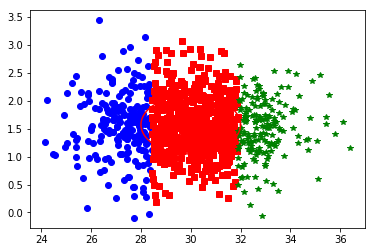

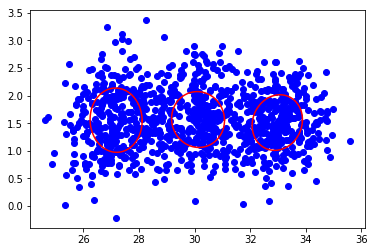

In [117]:
nodepaths,leafnodes=getleafpaths(clf)


Xleafids=getleafids(X0,nodepaths,leafnodes)

colors={2:'bo',3:'rs',4:'g*'}
plt.figure()
for lfn in leafnodes:
    plt.plot(X0[Xleafids==lfn,0],X0[Xleafids==lfn,1],colors[lfn])

plotellipse(Mu0,P0)


print newmeans
newcovs

plt.figure()
plt.plot(newX0[:,0],newX0[:,1],'bo')
for i in range(len(newmeans)):
    plotellipse(newmeans[i],newcovs[i])

[-3.28354162  2.3900795   1.89346212]


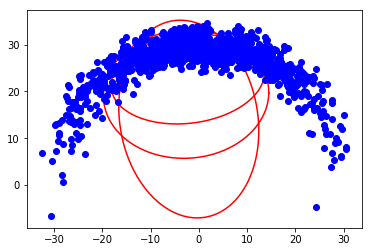

In [354]:



GMM=GaussMixModel([1/3,1/3,1/3],newmeans,newcovs)
GMM.optimize_weights_original(newX0,Mu0,P0)
GMM1=transformGMM(GMM,F)
print GMM1.weights
# GMM1.optimize_weights_prob(Y,py)
# print GMM1.weights
plt.figure()
GMM1.plotcomp_ellipsoids(1)
plt.plot(Y[:,0],Y[:,1],'bo')
# GMM.evalaute_probability(newX0)

In [357]:
GMM1.weights

array([-3.28354162,  2.3900795 ,  1.89346212])

In [152]:
P=np.array([[ 0.87862884, -0.01223028],
        [-0.01223028,  0.33803451]])
M=np.array([27.17493968,   1.55542215])
mu=M.copy().reshape(1,-1)
A=sc.linalg.sqrtm(3*P)
mu+A[:,0]

array([[ 28.79842111,   1.54147344]])

In [250]:
N

1000

In [376]:
Mu0=np.array([[30],[np.pi/2]])
P0=np.array( [[2**2,0],[0,(np.pi/6)**2]] )
N=1000
X0=np.random.multivariate_normal(Mu0.transpose()[0], P0, N)

N=X0.shape[0]
GMM0=GaussMixModel([1],[Mu0.reshape(1,-1)[0]],[P0])

Y=np.zeros((N,2))
p0=GMM0.evalaute_probability(X0)
py=np.zeros(p0.shape)

for i in range(N):
    Y[i,:]=F(X0[i,:])
    py[i]=p0[i]/np.linalg.det( FJac(X0[i,:]))

GMM1=transformGMM(GMM0,F)


In [377]:
print GMM1.weights
GMM1.randomsamples(10)

[1]


array([[ -2.37408358,  17.59099718],
       [ 23.59401306,  35.4528346 ],
       [ 26.24431732,  29.95494731],
       [-29.09782544,  27.16904684],
       [ -1.9216829 ,  36.87726318],
       [ 17.6575998 ,  21.29210972],
       [-20.62423576,  30.10517631],
       [  6.52083914,  23.65879727],
       [  7.55046684,  22.25325068],
       [ 15.29293441,  27.22335883]])

67.3785175046


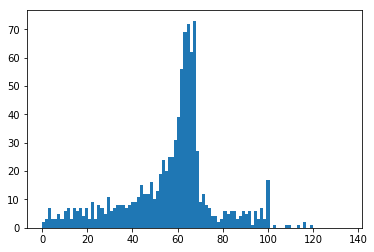

In [378]:

pyest=GMM1.evalaute_probability(Y)
pdiff=100*np.abs( np.divide((py-pyest),py) )


thres=np.percentile(np.abs(pdiff),75)
print thres
# plt.hist(np.abs(pdiff),100);
fig,ax=plt.subplots()
h=ax.hist(np.abs(pdiff),np.linspace(0,2*thres,100))

67.3785175046
151.0
25
			node=3 leaf node.
			node=4 leaf node.
		node=5 leaf node.
				node=9 leaf node.
					node=11 leaf node.
					node=12 leaf node.
					node=15 leaf node.
					node=16 leaf node.
				node=17 leaf node.
				node=20 leaf node.
				node=21 leaf node.
				node=23 leaf node.
				node=24 leaf node.


[array([-0.59979362,  9.86134806]),
 array([ -1.50724436,  17.58075542]),
 array([  1.06389458,  21.47685586]),
 array([-16.10837478,  25.00498249]),
 array([  1.0349195,  25.4051128]),
 array([ 16.30279294,  24.82407374]),
 array([-12.89286743,  27.76510713]),
 array([  1.18418589,  28.34673022]),
 array([ 13.91455762,  27.75441202]),
 array([ -4.42894643,  30.21420992]),
 array([  7.76371537,  30.2649316 ]),
 array([  0.61537016,  31.40604469]),
 array([ -1.38959802e-02,   3.29509695e+01])]

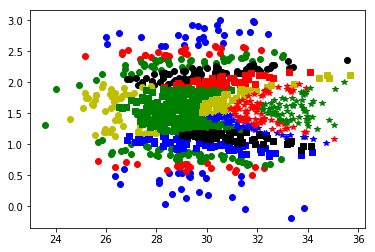

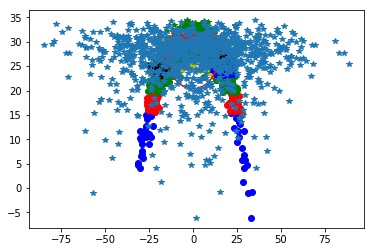

In [380]:
thres=np.percentile(np.abs(pdiff),75)
Yp=GMM1.randomsamples(1000,scale=2)

print thres
clf,nodepaths,leafnodes,Xleafids= getclassifiedregions(pdiff,thres,Y,min_samples_leaf=50,max_depth=5)
colors={2:'bo',3:'rs',5:'g*',6:'k*'}
def coloriter():
    for m in ['o','s','*','+']:
        for c in ['b','r','g','k','y']:
            yield c+m
p=coloriter()            
plt.figure()
for lfn in leafnodes:
    plt.plot(X0[Xleafids==lfn,0],X0[Xleafids==lfn,1],next(p))

p=coloriter()  
plt.figure()
for lfn in leafnodes:
    plt.plot(Y[Xleafids==lfn,0],Y[Xleafids==lfn,1],next(p))
GMM1.plotcomp_ellipsoids(1)
plt.plot(Yp[:,0],Y[:,1],'*')

newmeans,newcovs=getpartitionMeanCovs(X0,Xleafids)
Ynewmeans,Ynewcovs=getpartitionMeanCovs(Y,Xleafids)
Ynewmeans

[ 0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333]
[-1.8525882   1.20745383  1.60288998 -0.00470837 -0.07342307  0.01207965
  0.03586181  0.01270559  0.00559192  0.02219669  0.039597   -0.00765684]


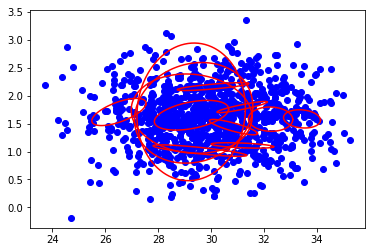

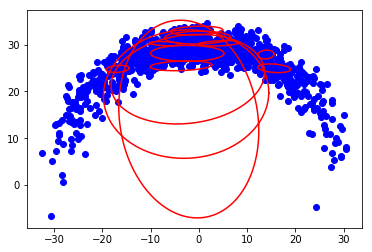

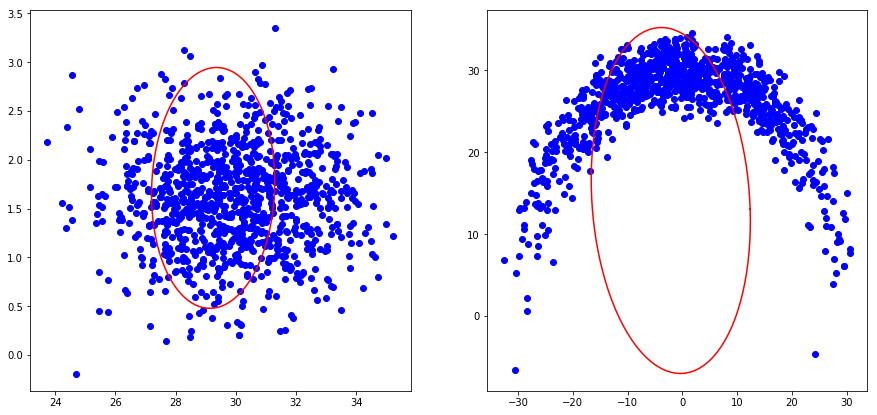

-----------------------------------------


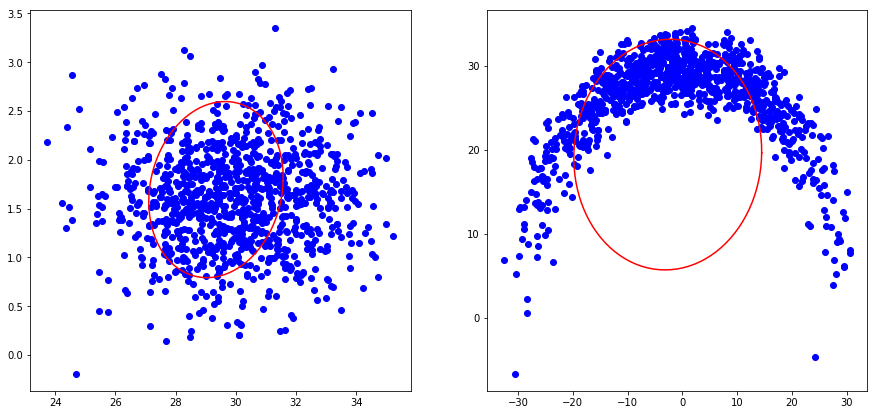

-----------------------------------------


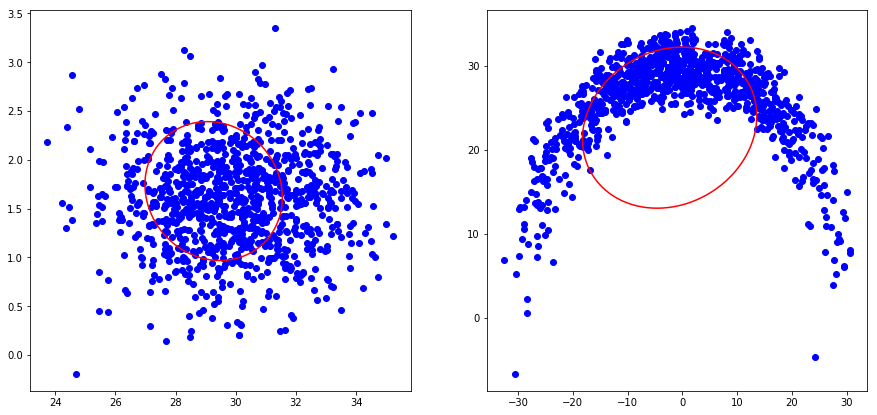

-----------------------------------------


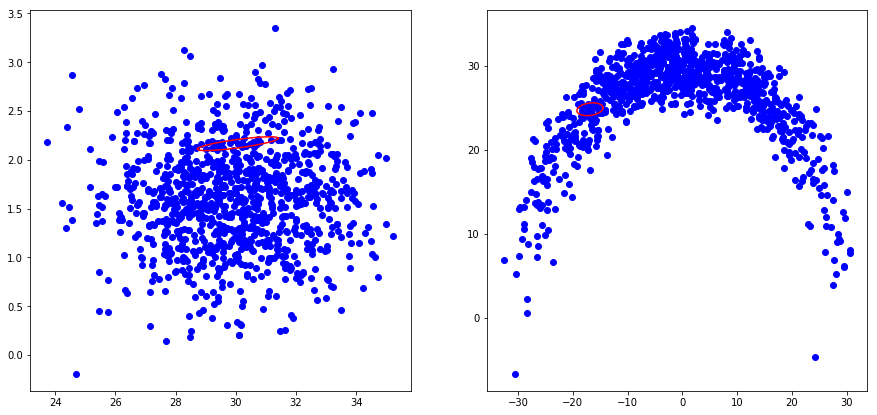

-----------------------------------------


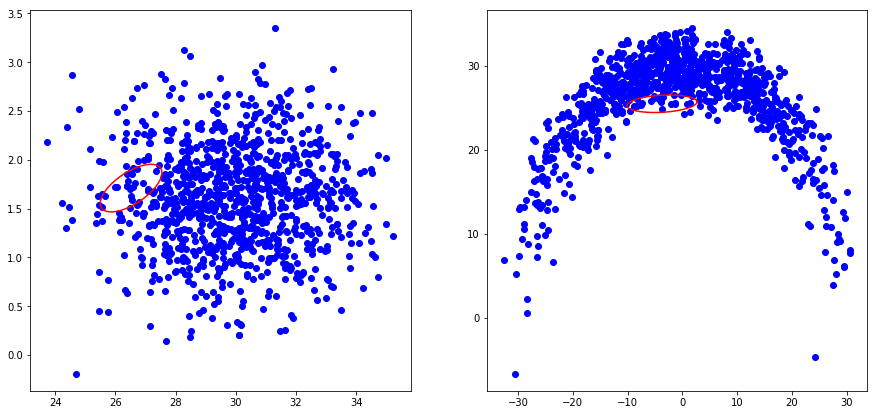

-----------------------------------------


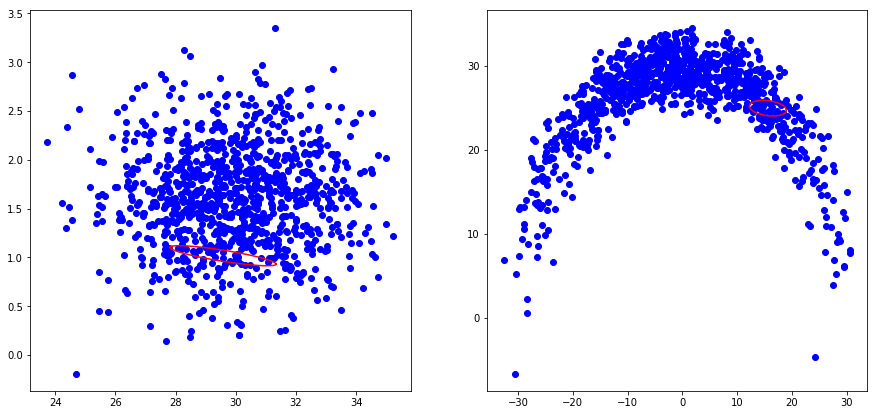

-----------------------------------------


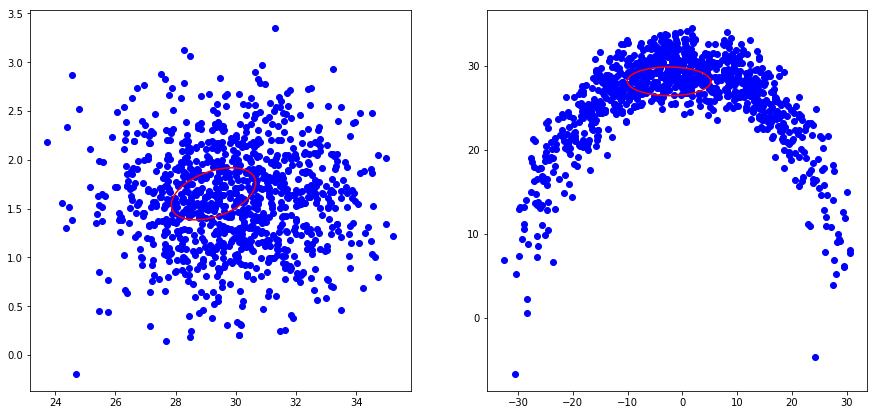

-----------------------------------------


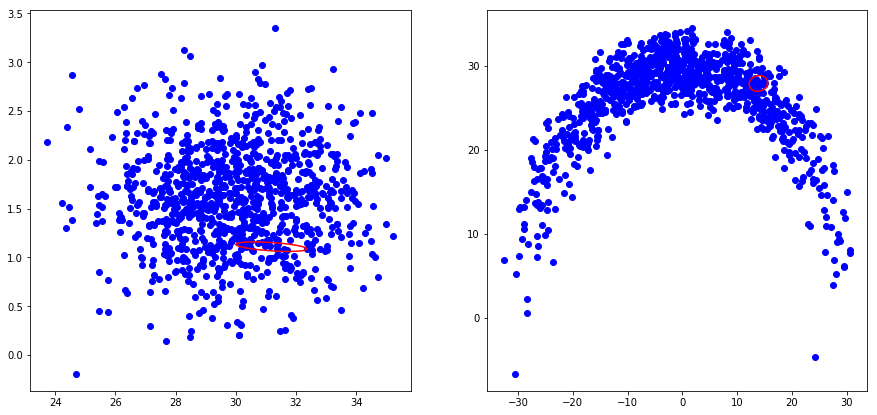

-----------------------------------------


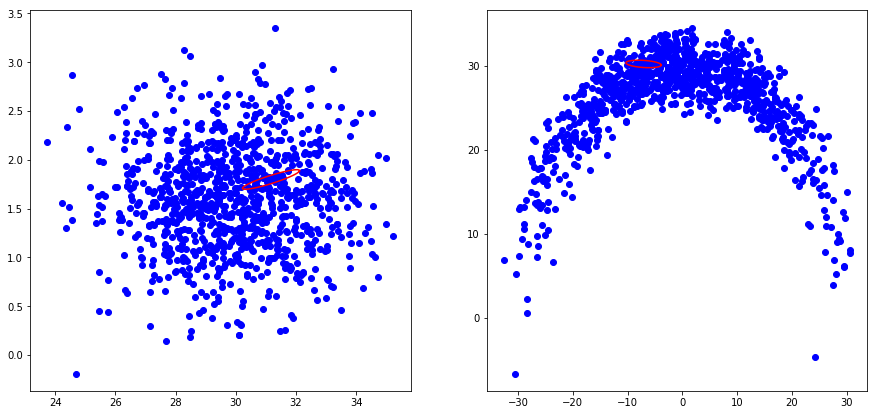

-----------------------------------------


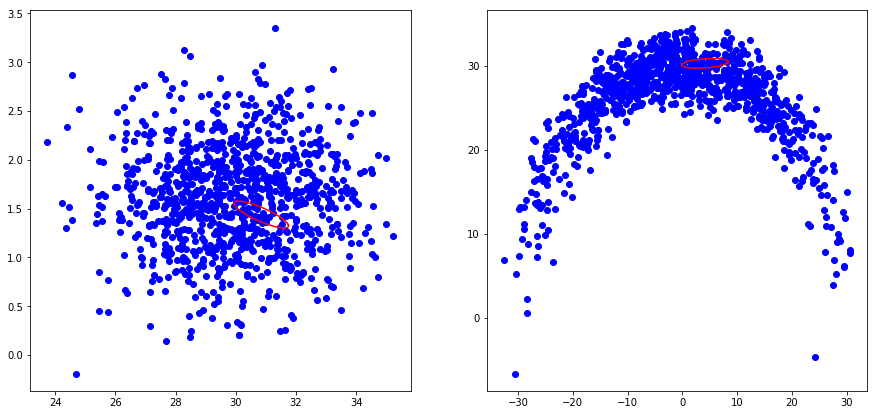

-----------------------------------------


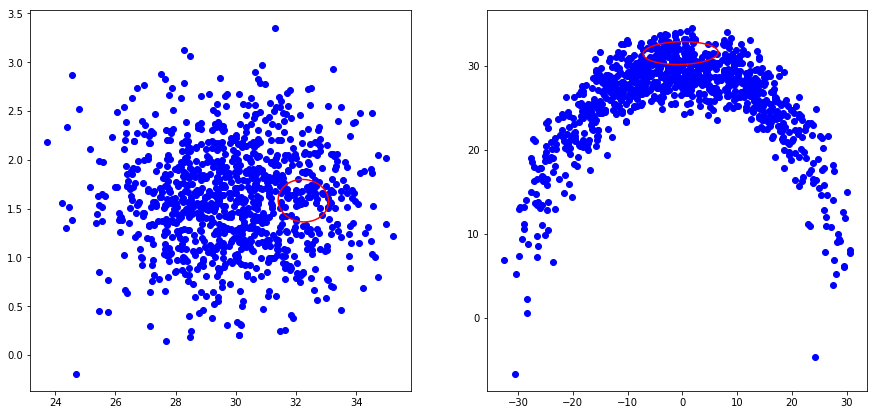

-----------------------------------------


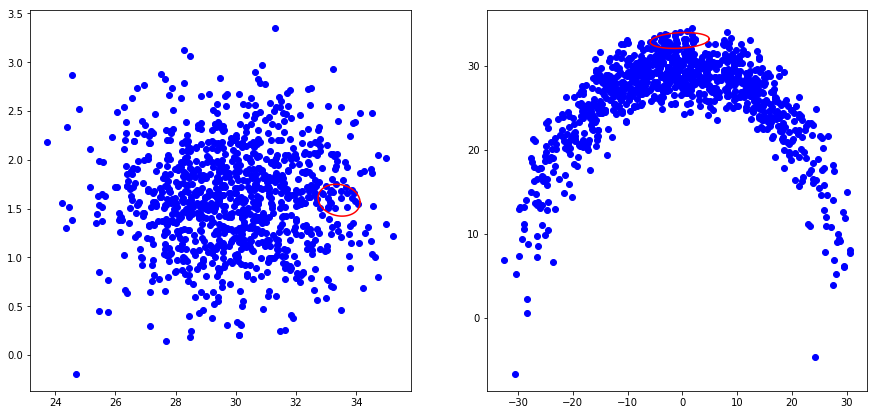

-----------------------------------------


In [343]:
newmeans,newcovs=getpartitionMeanCovs(X0,Xleafids)
Ncomp=len(newmeans)
GMM=GaussMixModel(np.ones(Ncomp)/Ncomp,newmeans,newcovs)
print GMM.weights
GMM.optimize_weights_original(X0,Mu0,P0)
print GMM.weights
GMM2=transformGMM(GMM,F)

plt.figure()
plt.plot(X0[:,0],X0[:,1],'bo')
GMM.plotcomp_ellipsoids(1)


plt.figure()
plt.plot(Y[:,0],Y[:,1],'bo')
GMM2.plotcomp_ellipsoids(1)

for i in range(GMM2.N):
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].plot(X0[:,0],X0[:,1],'bo')
    GMM.plotcomp_ellipsoids(1,i,ax=ax[0])

    ax[1].plot(Y[:,0],Y[:,1],'bo')
    GMM2.plotcomp_ellipsoids(1,i,ax=ax[1])
    
    plt.show()
    print "-----------------------------------------"

In [195]:
next( p )

'ro'